In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from pprint import pprint

sys.path.append("../")

load_dotenv() 

True

In [2]:
FRED_API_KEY = os.getenv("FRED_API_KEY")

In [ ]:
# FRED
url = f'https://api.stlouisfed.org/fred/series/observations?series_id=SP500&api_key={FRED_API_KEY}&file_type=json'


r = requests.get(url)
data = r.json()

pprint(data.keys())

In [48]:
df_sp500 = pd.DataFrame(data['observations'])
df_sp500["date"] = pd.to_datetime(df_sp500["date"])

In [49]:
df_sp500 = df_sp500.drop(["realtime_start", "realtime_end"], axis=1).set_index("date").rename(columns={"value":"close"})
df_sp500["close"] = df_sp500["close"].apply(pd.to_numeric, errors='coerce')

In [62]:
df_sp500["close_lag_1"] = df_sp500["close"].shift(periods=1)

In [63]:
df_sp500["daily_return"] = (df_sp500["close"] / df_sp500["close_lag_1"]) - 1

In [64]:
df_sp500

,close,close_lag_1,daily_return
date,,,
2014-04-30,1883.95,NaN,NaN
2014-05-01,1883.68,1883.95,-0.000143
2014-05-02,1881.14,1883.68,-0.001348
2014-05-05,1884.66,1881.14,0.001871
2014-05-06,1867.72,1884.66,-0.008988
...,...,...,...
2024-04-23,5070.55,5010.60,0.011965
2024-04-24,5071.63,5070.55,0.000213
2024-04-25,5048.42,5071.63,-0.004576


Text(0.5, 1.0, 'SP500 Closing Prices')

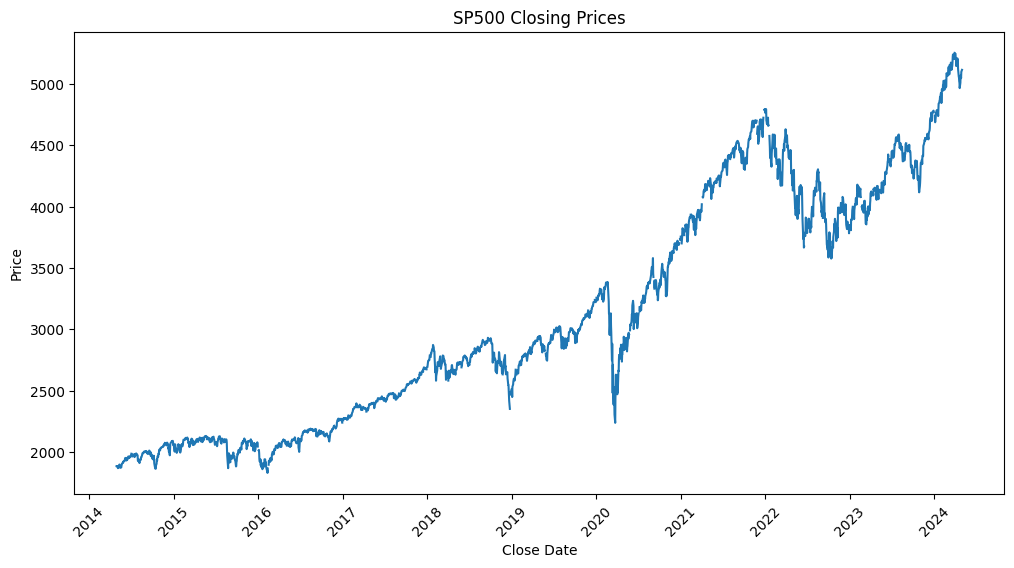

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(df_sp500.index, df_sp500["close"])

# Set the x-axis label and rotate the tick labels
ax.set_xlabel('Close Date')
plt.xticks(rotation=45)

# Set the y-axis label
ax.set_ylabel('Price')

# Set the plot title
plt.title('SP500 Closing Prices')

Text(0.5, 1.0, 'SP500 Daily Returns (%)')

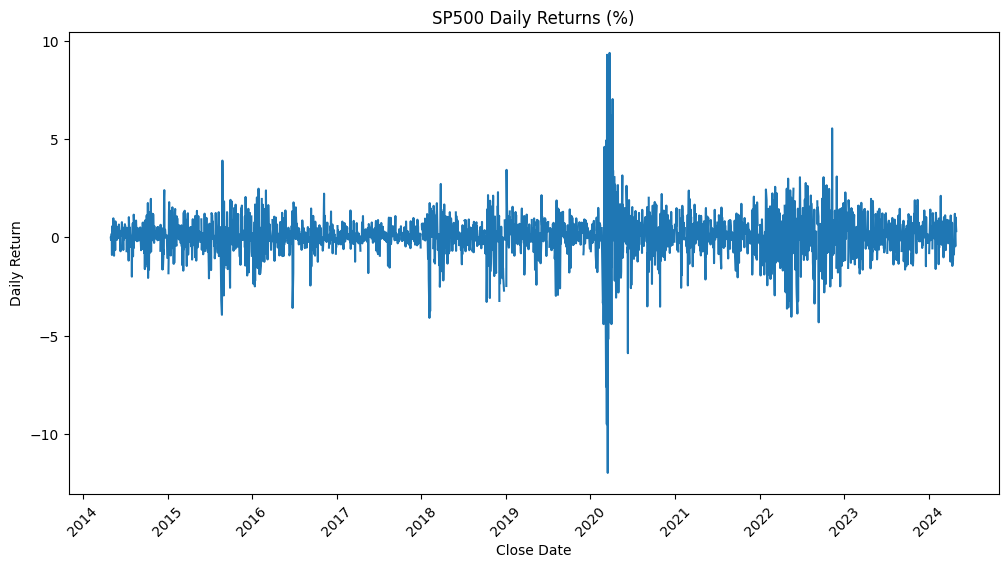

In [66]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(df_sp500.index, df_sp500["daily_return"] * 100)

# Set the x-axis label and rotate the tick labels
ax.set_xlabel('Close Date')
plt.xticks(rotation=45)

# Set the y-axis label
ax.set_ylabel('Daily Return')

# Set the plot title
plt.title('SP500 Daily Returns (%)')

In [69]:
%%markdown
* get the daily returns for an sp500 stock (SYF)
* regress against daily returns of the s&p500
* make a chart

* get the daily returns for an sp500 stock (SYF)
* regress against daily returns of the s&p500
* make a chart


In [14]:
def get_daily_stock_prices(ticker):
    if not isinstance(ticker, str):
        raise TypeError("Ticker must be a string.")
    try:
        url = f'https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/2021-05-01/2024-01-01?sort=asc&apiKey={POLYGON_API_KEY}'
        r = requests.get(url)
        data = r.json()
        return data
    except:
        raise ValueError

In [16]:
data = get_daily_stock_prices("SYF")

In [38]:
def make_stock_df(data):
    ticker = data["ticker"]
    df = pd.DataFrame(data["results"])
    df["ticker"] = ticker
    df["date"] = pd.to_datetime(df["t"], unit='ms')
    df.set_index("date", inplace=True)
    df.index = pd.to_datetime(df.index.date)
    return df

In [39]:
df_SYF = make_stock_df(data)

In [40]:
df_SYF

,v,vw,o,c,h,l,t,n,ticker
2022-05-04,8662214.0,39.3464,38.38,40.14,40.385,38.230,1651636800000,81970,SYF
2022-05-05,7838572.0,39.3487,39.54,39.33,40.210,38.800,1651723200000,85859,SYF
2022-05-06,8408173.0,38.2087,39.28,38.05,39.460,37.710,1651809600000,75967,SYF
2022-05-09,7997352.0,37.2626,37.45,37.03,38.190,36.825,1652068800000,82917,SYF
2022-05-10,7150697.0,36.1703,37.41,36.16,37.700,35.210,1652155200000,74604,SYF
...,...,...,...,...,...,...,...,...,...
2023-12-22,2337439.0,38.1083,38.27,37.94,38.440,37.840,1703221200000,27396,SYF
2023-12-26,1939456.0,38.2218,38.13,38.27,38.335,37.910,1703566800000,22074,SYF
2023-12-27,1722713.0,38.2761,38.18,38.35,38.405,38.045,1703653200000,22798,SYF
2023-12-28,1792737.0,38.3629,38.34,38.37,38.510,38.225,1703739600000,20641,SYF


In [5]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://api.polygon.io/v2/aggs/ticker/SYF/range/1/day/2021-05-01/2024-01-01?sort=asc&apiKey={POLYGON_API_KEY}'
r = requests.get(url)
data = r.json()

print(data)

{'ticker': 'SYF', 'queryCount': 417, 'resultsCount': 417, 'adjusted': True, 'results': [{'v': 8662214.0, 'vw': 39.3464, 'o': 38.38, 'c': 40.14, 'h': 40.385, 'l': 38.23, 't': 1651636800000, 'n': 81970}, {'v': 7838572.0, 'vw': 39.3487, 'o': 39.54, 'c': 39.33, 'h': 40.21, 'l': 38.8, 't': 1651723200000, 'n': 85859}, {'v': 8408173.0, 'vw': 38.2087, 'o': 39.28, 'c': 38.05, 'h': 39.46, 'l': 37.71, 't': 1651809600000, 'n': 75967}, {'v': 7997352.0, 'vw': 37.2626, 'o': 37.45, 'c': 37.03, 'h': 38.19, 'l': 36.825, 't': 1652068800000, 'n': 82917}, {'v': 7150697.0, 'vw': 36.1703, 'o': 37.41, 'c': 36.16, 'h': 37.7, 'l': 35.21, 't': 1652155200000, 'n': 74604}, {'v': 6395071.0, 'vw': 36.107, 'o': 36.08, 'c': 35.33, 'h': 37.33, 'l': 35.285, 't': 1652241600000, 'n': 68900}, {'v': 10467489.0, 'vw': 33.1169, 'o': 34.19, 'c': 33.03, 'h': 34.57, 'l': 32.045, 't': 1652328000000, 'n': 104812}, {'v': 7334442.0, 'vw': 33.7392, 'o': 33.35, 'c': 33.55, 'h': 34.355, 'l': 33.33, 't': 1652414400000, 'n': 65127}, {'v'

In [6]:
pprint(data)

{'adjusted': True,
 'count': 417,
 'queryCount': 417,
 'request_id': '0cc6115f2b3ee7a069293187934d0dfb',
 'results': [{'c': 40.14,
              'h': 40.385,
              'l': 38.23,
              'n': 81970,
              'o': 38.38,
              't': 1651636800000,
              'v': 8662214.0,
              'vw': 39.3464},
             {'c': 39.33,
              'h': 40.21,
              'l': 38.8,
              'n': 85859,
              'o': 39.54,
              't': 1651723200000,
              'v': 7838572.0,
              'vw': 39.3487},
             {'c': 38.05,
              'h': 39.46,
              'l': 37.71,
              'n': 75967,
              'o': 39.28,
              't': 1651809600000,
              'v': 8408173.0,
              'vw': 38.2087},
             {'c': 37.03,
              'h': 38.19,
              'l': 36.825,
              'n': 82917,
              'o': 37.45,
              't': 1652068800000,
              'v': 7997352.0,
              'vw': 37.2626}

In [3]:
from stocks_feed.dataloader import Stock

In [4]:
s = Stock("SYF")

In [5]:
s.df

,v,vw,o,c,h,l,t,n,ticker
2022-05-04,8662214.0,39.3464,38.38,40.14,40.385,38.230,1651636800000,81970,SYF
2022-05-05,7838572.0,39.3487,39.54,39.33,40.210,38.800,1651723200000,85859,SYF
2022-05-06,8408173.0,38.2087,39.28,38.05,39.460,37.710,1651809600000,75967,SYF
2022-05-09,7997352.0,37.2626,37.45,37.03,38.190,36.825,1652068800000,82917,SYF
2022-05-10,7150697.0,36.1703,37.41,36.16,37.700,35.210,1652155200000,74604,SYF
...,...,...,...,...,...,...,...,...,...
2023-12-22,2337439.0,38.1083,38.27,37.94,38.440,37.840,1703221200000,27396,SYF
2023-12-26,1939456.0,38.2218,38.13,38.27,38.335,37.910,1703566800000,22074,SYF
2023-12-27,1722713.0,38.2761,38.18,38.35,38.405,38.045,1703653200000,22798,SYF
2023-12-28,1792737.0,38.3629,38.34,38.37,38.510,38.225,1703739600000,20641,SYF
